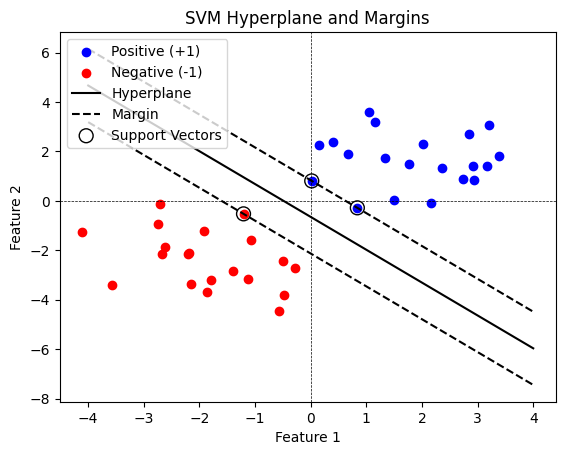

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data
np.random.seed(69)
class1 = np.random.randn(20, 2) + [2, 2]
class2 = np.random.randn(20, 2) + [-2, -2]
X = np.vstack((class1, class2))  # Combine the two classes
y = np.hstack((np.ones(20), -np.ones(20)))  # Labels: +1 for class1, -1 for class2

# Train SVM model
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Extract the hyperplane parameters
w = model.coef_[0]  # Coefficients of the hyperplane
b = model.intercept_[0]  # Intercept
margin = 1 / np.linalg.norm(w)  # Margin width

# Create a grid for plotting
x = np.linspace(-4, 4, 100)
hyperplane = -(w[0] / w[1]) * x - b / w[1]  # Equation of the hyperplane
margin1 = hyperplane + margin * np.sqrt(1 + (w[0] / w[1]) ** 2)  # Margin above
margin2 = hyperplane - margin * np.sqrt(1 + (w[0] / w[1]) ** 2)  # Margin below

# Plot data points
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Positive (+1)')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Negative (-1)')

# Plot hyperplane and margins
plt.plot(x, hyperplane, 'k-', label='Hyperplane')
plt.plot(x, margin1, 'k--', label='Margin')
plt.plot(x, margin2, 'k--')

# Highlight support vectors
support_vectors = model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Add labels and legend
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(loc='upper left')
plt.title("SVM Hyperplane and Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(False)
plt.show()


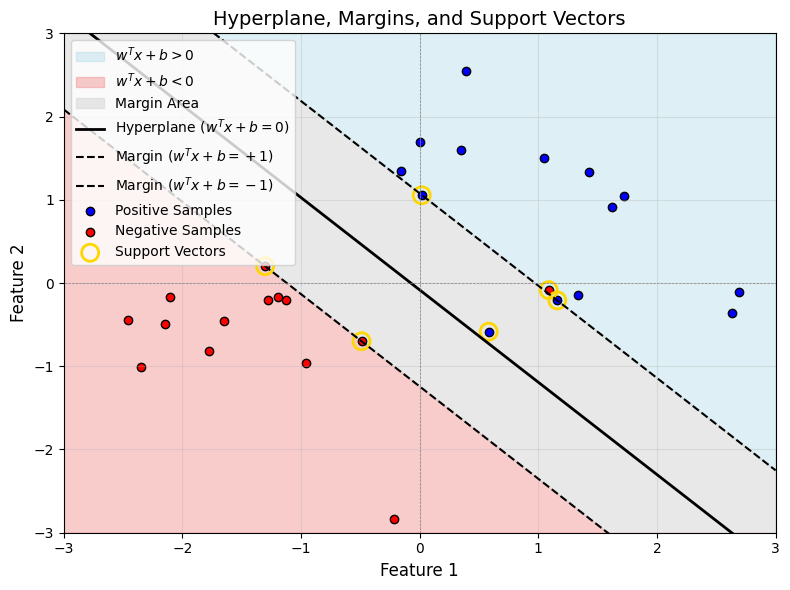

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data
np.random.seed(4)
class1 = np.random.randn(15, 2) + [1, 1]  # Points on one side
class2 = np.random.randn(15, 2) + [-1, -1]  # Points on the other side

# Combine data and labels
X = np.vstack((class1, class2))
y = np.hstack((np.ones(15), -np.ones(15)))

# Train SVM to obtain hyperplane
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Extract the hyperplane parameters
w = model.coef_[0]
b = model.intercept_[0]

# Create grid for plotting
x = np.linspace(-3, 3, 100)  # X-axis range
hyperplane = -(w[0] / w[1]) * x - b / w[1]  # Hyperplane equation
margin1 = hyperplane + 1 / w[1]  # Margin above
margin2 = hyperplane - 1 / w[1]  # Margin below

# Extract support vectors
support_vectors = model.support_vectors_

# Plot setup
plt.figure(figsize=(8, 6))

# Fill the three regions with soft colors
plt.fill_between(x, margin1, 3, color='lightblue', alpha=0.4, label='$w^T x + b > 0$')  # Positive side
plt.fill_between(x, margin2, -3, color='lightcoral', alpha=0.4, label='$w^T x + b < 0$')  # Negative side
plt.fill_between(x, margin2, margin1, color='lightgray', alpha=0.5, label='Margin Area')  # Margin area

# Plot the hyperplane and margins
plt.plot(x, hyperplane, 'k-', linewidth=2, label='Hyperplane ($w^T x + b = 0$)')
plt.plot(x, margin1, 'k--', linewidth=1.5, label='Margin ($w^T x + b = +1$)')
plt.plot(x, margin2, 'k--', linewidth=1.5, label='Margin ($w^T x + b = -1$)')

# Plot data points
plt.scatter(class1[:, 0], class1[:, 1], color='blue', edgecolor='k', label='Positive Samples')
plt.scatter(class2[:, 0], class2[:, 1], color='red', edgecolor='k', label='Negative Samples')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
            s=150, facecolors='none', edgecolors='gold', linewidth=2, label='Support Vectors')

# Aesthetics and annotations
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend(loc='upper left', fontsize=10)
plt.title("Hyperplane, Margins, and Support Vectors", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


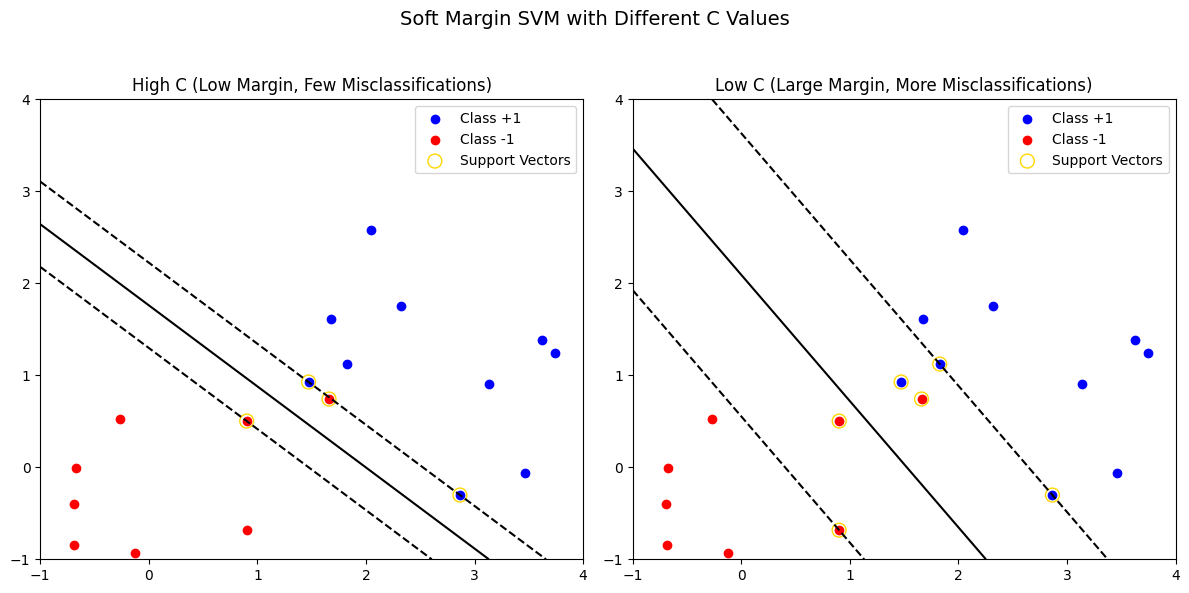

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data
np.random.seed(1)
class1 = np.random.randn(10, 2) + [2, 2]
class2 = np.random.randn(10, 2) + [0, 0]
X = np.vstack((class1, class2))
y = np.hstack((np.ones(10), -np.ones(10)))

# Train two SVM models with different C values
svm_high_C = SVC(kernel='linear', C=100)  # High C: less tolerance for errors
svm_low_C = SVC(kernel='linear', C=1)   # Low C: more tolerance for errors
svm_high_C.fit(X, y)
svm_low_C.fit(X, y)

# Function to plot SVM decision boundaries and support vectors
def plot_svm(model, ax, title):
    # Scatter plot of the data
    ax.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class +1')
    ax.scatter(class2[:, 0], class2[:, 1], color='red', label='Class -1')
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='gold', label='Support Vectors')
    
    # Create grid to plot decision boundary
    x = np.linspace(-1, 4, 100)
    y = np.linspace(-1, 4, 100)
    X1, X2 = np.meshgrid(x, y)
    xy = np.vstack([X1.ravel(), X2.ravel()]).T
    decision_function = model.decision_function(xy).reshape(X1.shape)
    
    # Plot decision boundary and margins
    ax.contour(X1, X2, decision_function, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_title(title, fontsize=12)
    ax.legend(loc='upper right')

# Create figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot high C
plot_svm(svm_high_C, axs[0], "High C (Low Margin, Few Misclassifications)")

# Plot low C
plot_svm(svm_low_C, axs[1], "Low C (Large Margin, More Misclassifications)")

# Add overall title
plt.suptitle("Soft Margin SVM with Different C Values", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


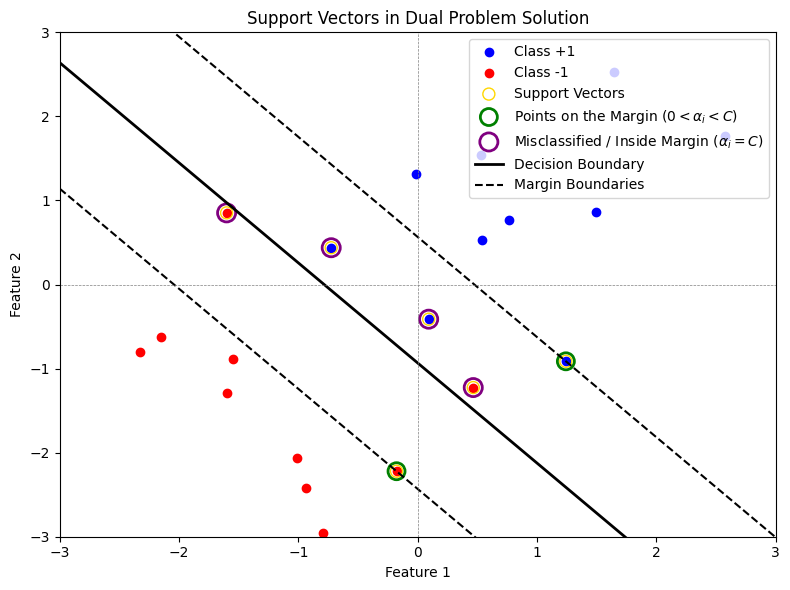

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data
np.random.seed(42)
class1 = np.random.randn(10, 2) + [1, 1]   # Positive class (+1)
class2 = np.random.randn(10, 2) + [-1, -1]  # Negative class (-1)

# Combine the data
X = np.vstack((class1, class2))  # Features
y = np.hstack((np.ones(10), -np.ones(10)))  # Labels

# Train SVM with soft margin (C parameter)
C_value = 1.0
svm = SVC(kernel='linear', C=C_value)
svm.fit(X, y)

# Decision function and support vectors
support_vectors = svm.support_vectors_
dual_coef = svm.dual_coef_[0]  # Dual coefficients (alpha_i * y_i)
margin_points = np.abs(dual_coef) < C_value  # Points on the margin
misclassified_points = np.abs(dual_coef) == C_value  # Misclassified or inside margin

# Plotting function
def plot_dual_support_vectors():
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of all points
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class +1')
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class -1')

    # Highlight support vectors
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                s=75, facecolors='none', edgecolors='gold', label='Support Vectors')
    
    # Highlight margin points (0 < α < C)
    plt.scatter(support_vectors[margin_points, 0], support_vectors[margin_points, 1],
                s=150, edgecolors='green', facecolors='none', linewidths=2,
                label='Points on the Margin ($0 < \\alpha_i < C$)')

    # Highlight misclassified/inside margin points (α = C)
    plt.scatter(support_vectors[misclassified_points, 0], support_vectors[misclassified_points, 1],
                s=170, edgecolors='purple', facecolors='none', linewidths=2,
                label='Misclassified / Inside Margin ($\\alpha_i = C$)')

    # Plot decision boundary and margins
    w = svm.coef_[0]
    b = svm.intercept_[0]
    x = np.linspace(-3, 3, 100)
    decision_boundary = -(w[0] / w[1]) * x - b / w[1]
    margin_upper = decision_boundary + 1 / w[1]
    margin_lower = decision_boundary - 1 / w[1]
    plt.plot(x, decision_boundary, 'k-', linewidth=2, label='Decision Boundary')
    plt.plot(x, margin_upper, 'k--', linewidth=1.5, label='Margin Boundaries')
    plt.plot(x, margin_lower, 'k--', linewidth=1.5)

    # Aesthetics
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.title("Support Vectors in Dual Problem Solution")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
plot_dual_support_vectors()


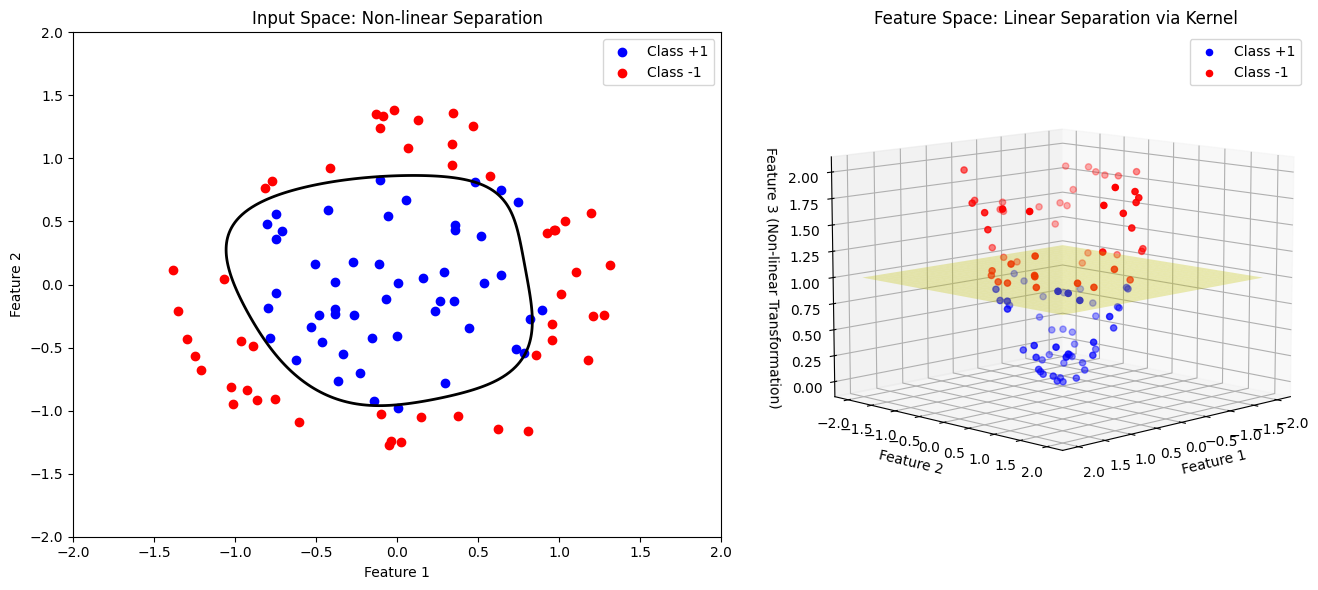

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic non-linear data (two classes in a circular pattern)
np.random.seed(1)
n_samples = 100

# Class 1: Points within a circle
r1 = np.sqrt(np.random.rand(n_samples // 2))  # Radius
theta1 = np.pi * (np.random.rand(n_samples // 2) * 2)  # Angle
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)
class1 = np.vstack((x1, y1)).T

# Class 2: Points outside the circle
r2 = np.sqrt(1 + np.random.rand(n_samples // 2))  # Radius
theta2 = np.pi * (np.random.rand(n_samples // 2) * 2)  # Angle
x2 = r2 * np.cos(theta2)
y2 = r2 * np.sin(theta2)
class2 = np.vstack((x2, y2)).T

# Combine the two classes
X = np.vstack((class1, class2))
y = np.hstack((np.ones(n_samples // 2), -np.ones(n_samples // 2)))

# Train a non-linear SVM with RBF kernel
svm = SVC(kernel='rbf', C=1, gamma=2)
svm.fit(X, y)

# Grid for decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot: Non-linear data in 2D
fig = plt.figure(figsize=(14, 6))

# Subplot 1: Input Space (2D)
ax1 = fig.add_subplot(121)
ax1.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class +1')
ax1.scatter(class2[:, 0], class2[:, 1], color='red', label='Class -1')
ax1.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')  # Decision boundary
ax1.set_title("Input Space: Non-linear Separation")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.legend()

# Subplot 2: Feature Space (3D) - Using a Kernel Trick
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=10, azim=45)  # Cambia la perspectiva aquí
z_class1 = np.square(class1[:, 0]) + np.square(class1[:, 1])
z_class2 = np.square(class2[:, 0]) + np.square(class2[:, 1])

ax2.scatter(class1[:, 0], class1[:, 1], z_class1, color='blue', label='Class +1')
ax2.scatter(class2[:, 0], class2[:, 1], z_class2, color='red', label='Class -1')

# Hyperplane in 3D (approximation)
X3d, Y3d = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))
Z3d = np.ones_like(X3d)  # Plane at Z = 1 for visualization
ax2.plot_surface(X3d, Y3d, Z3d, alpha=0.3, color='yellow', edgecolor='none')


ax2.set_title("Feature Space: Linear Separation via Kernel")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_zlabel("Feature 3 (Non-linear Transformation)")
ax2.legend()

# Adjust layout and show
plt.tight_layout()
plt.show()


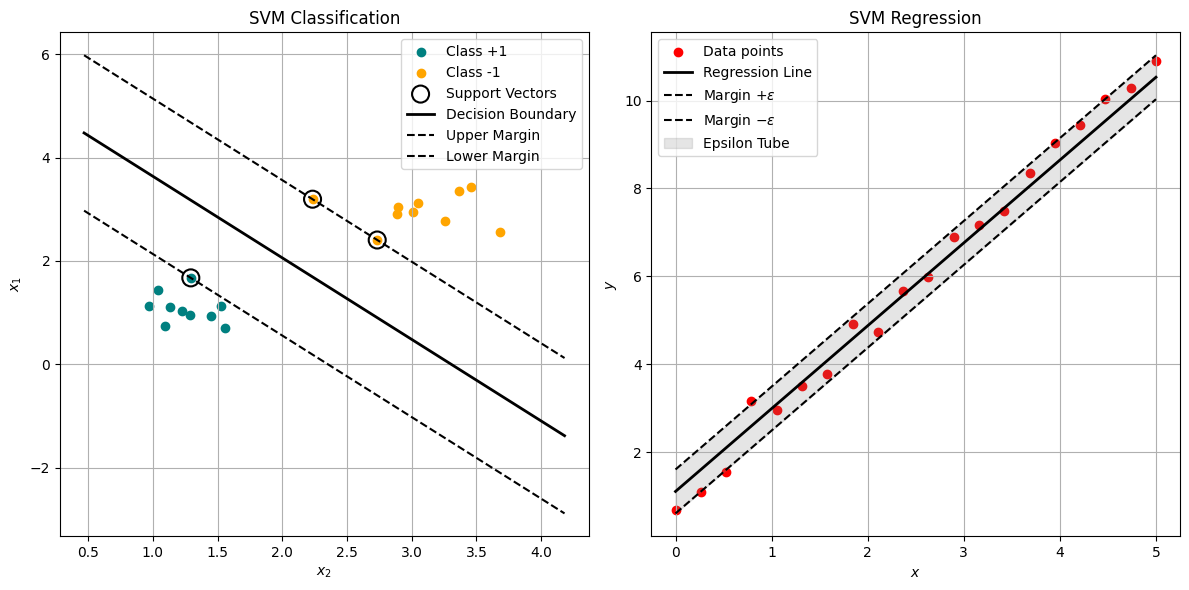

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR

# Generate synthetic data
np.random.seed(0)

# Data for Classification (two separate classes)
X_class_1 = np.random.normal(loc=[1, 1], scale=0.3, size=(10, 2))
X_class_2 = np.random.normal(loc=[3, 3], scale=0.3, size=(10, 2))
X_class = np.vstack((X_class_1, X_class_2))
y_class = np.hstack((np.ones(10), -1 * np.ones(10)))

# Data for Regression (linear with noise)
X_reg = np.linspace(0, 5, 20).reshape(-1, 1)
y_reg = 2 * X_reg.ravel() + 1 + np.random.normal(scale=0.3, size=20)

# Classification SVM Model
svc = SVC(kernel='linear', C=1)
svc.fit(X_class, y_class)

# Regression SVM Model
svr = SVR(kernel='linear', epsilon=0.5, C=1)
svr.fit(X_reg, y_reg)

# Retrieve coefficients for Classification
w = svc.coef_[0]  # Slope components for decision boundary
b = svc.intercept_[0]

# Decision boundary and margins
xx = np.linspace(X_class[:, 0].min() - 0.5, X_class[:, 0].max() + 0.5, 100)
yy = -(w[0] * xx + b) / w[1]  # Decision boundary
margin = 1 / np.linalg.norm(w)  # Margin width
yy_up = -(w[0] * xx + b - 1) / w[1]  # Upper margin
yy_down = -(w[0] * xx + b + 1) / w[1]  # Lower margin

# Support Vectors
support_vectors = svc.support_vectors_

# Predictions for Regression
y_pred = svr.predict(X_reg)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Classification Plot
axes[0].scatter(X_class_1[:, 0], X_class_1[:, 1], color='teal', label="Class +1")
axes[0].scatter(X_class_2[:, 0], X_class_2[:, 1], color='orange', label="Class -1")
axes[0].scatter(support_vectors[:, 0], support_vectors[:, 1],
                s=150, facecolors='none', edgecolors='k', linewidths=1.5, label="Support Vectors")
axes[0].plot(xx, yy, 'k-', linewidth=2, label="Decision Boundary")
axes[0].plot(xx, yy_up, 'k--', linewidth=1.5, label="Upper Margin")
axes[0].plot(xx, yy_down, 'k--', linewidth=1.5, label="Lower Margin")
axes[0].set_title("SVM Classification")
axes[0].set_xlabel("$x_2$")
axes[0].set_ylabel("$x_1$")
axes[0].legend()
axes[0].grid(True)

# Regression Plot
axes[1].scatter(X_reg, y_reg, color='red', label="Data points")
axes[1].plot(X_reg, y_pred, 'k-', linewidth=2, label="Regression Line")
axes[1].plot(X_reg, y_pred + svr.epsilon, 'k--', linewidth=1.5, label="Margin $+\epsilon$")
axes[1].plot(X_reg, y_pred - svr.epsilon, 'k--', linewidth=1.5, label="Margin $-\epsilon$")
axes[1].fill_between(X_reg.ravel(), y_pred - svr.epsilon, y_pred + svr.epsilon, 
                     color='gray', alpha=0.2, label="Epsilon Tube")
axes[1].set_title("SVM Regression")
axes[1].set_xlabel("$x$")
axes[1].set_ylabel("$y$")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


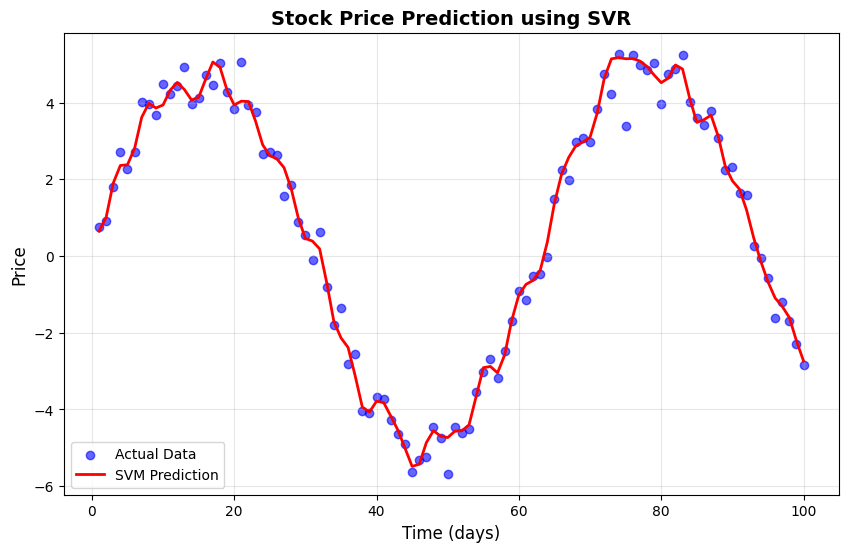

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Datos para regresión (Stock Market Prediction)
np.random.seed(42)
X_stock = np.linspace(1, 100, 100).reshape(-1, 1)  # Tiempo (días, por ejemplo)
y_stock = 5 * np.sin(X_stock / 10).ravel() + np.random.normal(scale=0.5, size=100)  # Precios con ruido

# Modelo SVR
svr_stock = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1).fit(X_stock, y_stock)
y_pred = svr_stock.predict(X_stock)

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_stock, y_stock, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_stock, y_pred, color='red', linewidth=2, label="SVM Prediction")
plt.title("Stock Price Prediction using SVR", fontsize=14, fontweight='bold')
plt.xlabel("Time (days)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
